**Problem Statement:**
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

**Strategy:**
1. Data Understanding and Quality Checks 
2. EDA    
    2.1 Numeric variable analysis with target variable <br>
    2.2 Categorical variable analysis with target variable
3. Model Building <br>
    3.1 Splitting data into test and train dataframes<br>
    3.2 Dividing into X and Y sets for the model building<br>
    3.3 Using RFE to select top 15 features for model<br>
    3.4 Building model using statsmodel
4. Residual Analysis
5. Model Predictions
6. Model Evaluation
7. Final Interpration of Model and Conclusion


In [1]:
### Importing the required libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Train-Test Split
from sklearn.model_selection import train_test_split

#For Normalization
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing Stats Model for model building
import statsmodels.api as sm

#Importing r2_score
from sklearn.metrics import r2_score

#Importing mean_squared_error
from sklearn.metrics import mean_squared_error

#Specifying all columns to be shown
pd.set_option('display.max_columns', None)

### 1. Data Understanding and Quality Checks

In [2]:
#Reading the file and viewing first 5 records
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.info()

##Observation: None of the columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#Removing Redundant Columns: #instant is an index hence not required for model builiding
#dteday is date which is insignificant in predicting demand as we have year month weekday in other columns
# casual and registered are not independent variables as we wont know their value at the time of using model for prediction
bike_df = bike_df.drop(['instant','dteday','casual', 'registered'], axis=1)
bike_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [7]:
#Converting season, mnth, weekday, weathersit to have more meaningful values for EDA
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['mnth'] = bike_df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',
                                       11:'nov',12:'dec'})
bike_df['weekday'] = bike_df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_df['weathersit'] = bike_df['weathersit'].map({1:"Clear_FewClouds_PartlyClouds",2:"Mist_Cloudy_BrokenClouds_FewClouds",
                                                   3:"LightSnow_LightRain_Thunderstorm_ScatteredClouds",
                                                   4:'HeavyRain_IcePallets_Thunderstorm_Mist'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist_Cloudy_BrokenClouds_FewClouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist_Cloudy_BrokenClouds_FewClouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear_FewClouds_PartlyClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear_FewClouds_PartlyClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear_FewClouds_PartlyClouds,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
numeric_cols = ['temp','atemp','hum','windspeed','cnt']
categorical_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

### 2. EDA

**2.1 Numeric variable analysis with target variable**

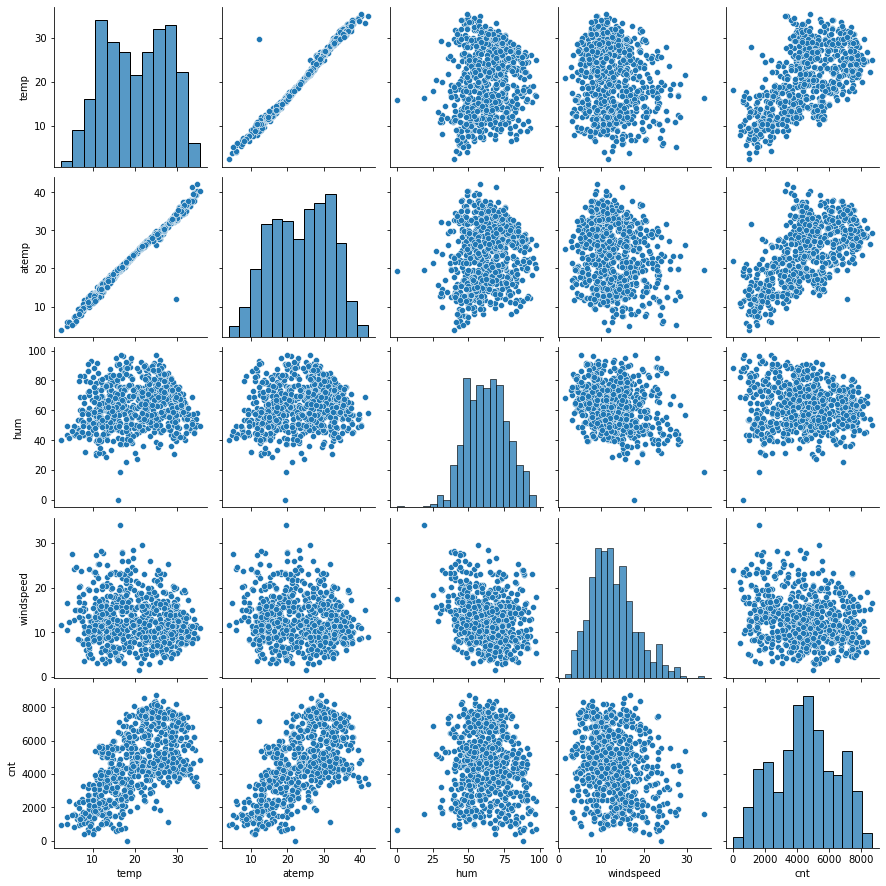

In [9]:
sns.pairplot(bike_df[numeric_cols])
plt.show()

#observations: - temp and atemp have high correlation, hence while model building we should only consider one of these variables
# - temp and atemp have positive linear correlation with cnt (target variable)

**2.2 Categorical variables analysis with target variable**

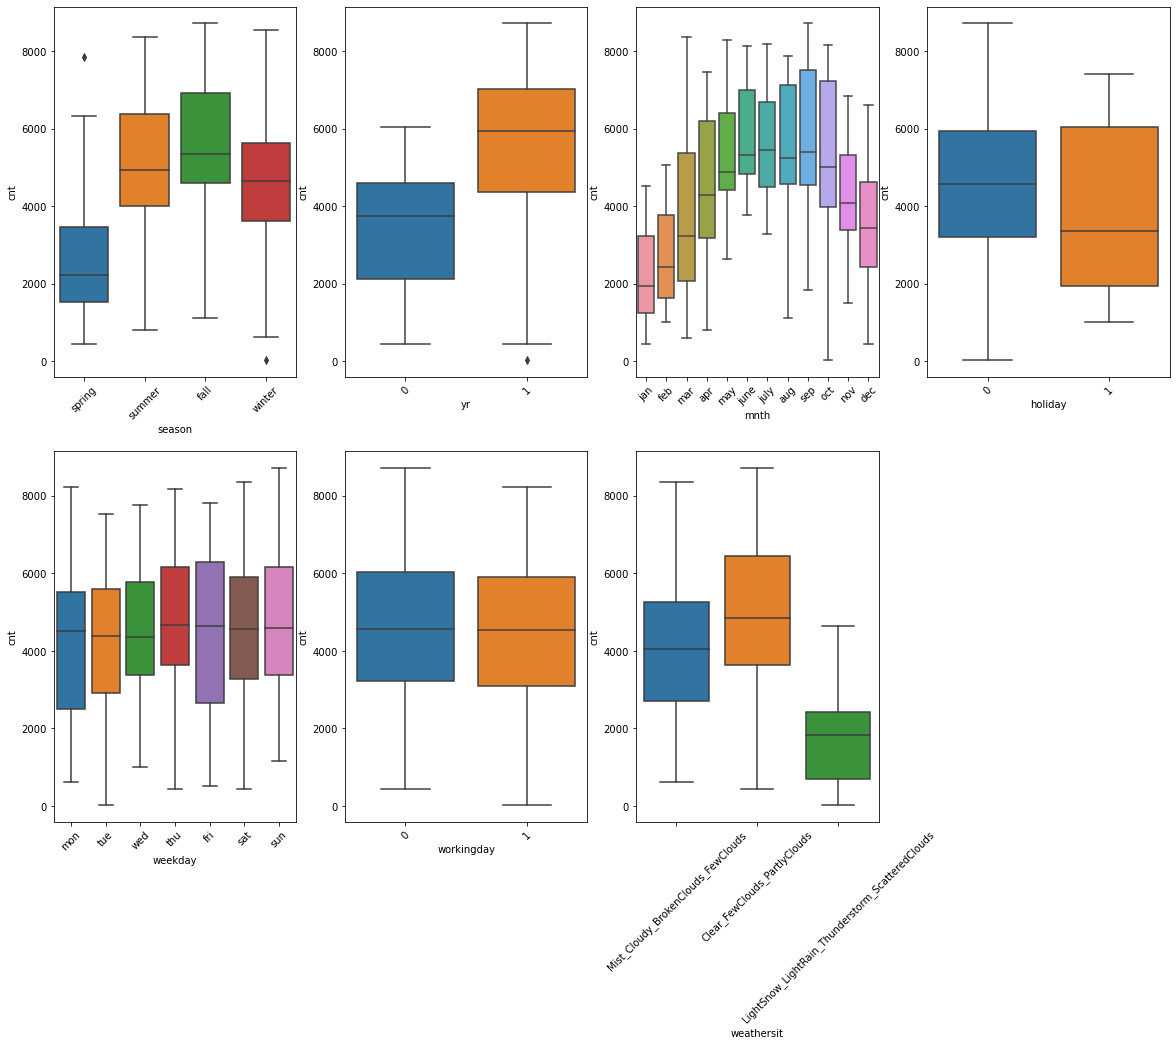

In [10]:
#visualizing categorical variables using box plot
plt.figure(figsize=(20, 15))
for i,j in enumerate(categorical_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(x = j, y = 'cnt', data = bike_df)
    plt.xticks(rotation='45')
plt.show()

In [11]:
for i,j in enumerate(categorical_cols):
  for k in bike_df[j].unique():
    print("Number of riders in " , j, " = " , k ," : ", round(100*bike_df[bike_df[j] == k].cnt.sum()/bike_df.cnt.sum(),2))

Number of riders in  season  =  spring  :  14.27
Number of riders in  season  =  summer  :  27.91
Number of riders in  season  =  fall  :  32.24
Number of riders in  season  =  winter  :  25.57
Number of riders in  yr  =  0  :  37.77
Number of riders in  yr  =  1  :  62.23
Number of riders in  mnth  =  jan  :  4.1
Number of riders in  mnth  =  feb  :  4.54
Number of riders in  mnth  =  mar  :  6.96
Number of riders in  mnth  =  apr  :  8.18
Number of riders in  mnth  =  may  :  10.08
Number of riders in  mnth  =  june  :  10.52
Number of riders in  mnth  =  july  :  10.48
Number of riders in  mnth  =  aug  :  10.67
Number of riders in  mnth  =  sep  :  10.51
Number of riders in  mnth  =  oct  :  9.8
Number of riders in  mnth  =  nov  :  7.74
Number of riders in  mnth  =  dec  :  6.41
Number of riders in  holiday  =  0  :  97.62
Number of riders in  holiday  =  1  :  2.38
Number of riders in  weekday  =  mon  :  13.59
Number of riders in  weekday  =  tue  :  13.64
Number of riders in  w

**Categorical variable analysis:**
- Variables with boolean values:
1.   Year: 0 = 2018, 1 = 2019
2.   Holiday: 0 = Not a holiday, 1 : Holiday
3.   Working day: 0 = Not a working day, 1: Working day

- **Season** - Fall is the most preferrable seasons for the riders. 32% riders were from fall season and 27% from summer.
- **Year** - 62% of riders were from year 2019 as the demand may have increased due to increased popularity.
- **Months** - May - October are the most preferable months as each of them have  >9% of ridership. 
- **Holiday** - 97% of riders on non-holidays suggets that the riders might be using bicycle for travelling to work.
- **Weekday** - Very slight variation in ridership trend hence it is not a good indicator of demand.
- **Working Day**- 67% of riders were from a Working Day, again indicating that riders might be using bicycle for travelling to work.
- **Weather Condition** - 68% riders had Clear Sky or Few Clouds on the day of their ride. 

In [12]:
# Dropping the first column from the dummies created using 'drop_first = True' to avoid multicollinearity in the model
season = pd.get_dummies(bike_df['season'], drop_first = True)
mnth = pd.get_dummies(bike_df['mnth'], drop_first = True)
weathersit = pd.get_dummies(bike_df['weathersit'], drop_first = True)
weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)

In [13]:
#Merging into main df
bike_df = pd.concat([bike_df,season,mnth,weathersit,weekday],axis=1)

# Dropping the original column
bike_df.drop('season',axis=1, inplace=True) 
bike_df.drop('mnth',axis=1, inplace=True) 
bike_df.drop('weathersit',axis=1, inplace=True) 
bike_df.drop('weekday',axis=1, inplace=True)

bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,LightSnow_LightRain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds_FewClouds,mon,sat,sun,thu,tue,wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


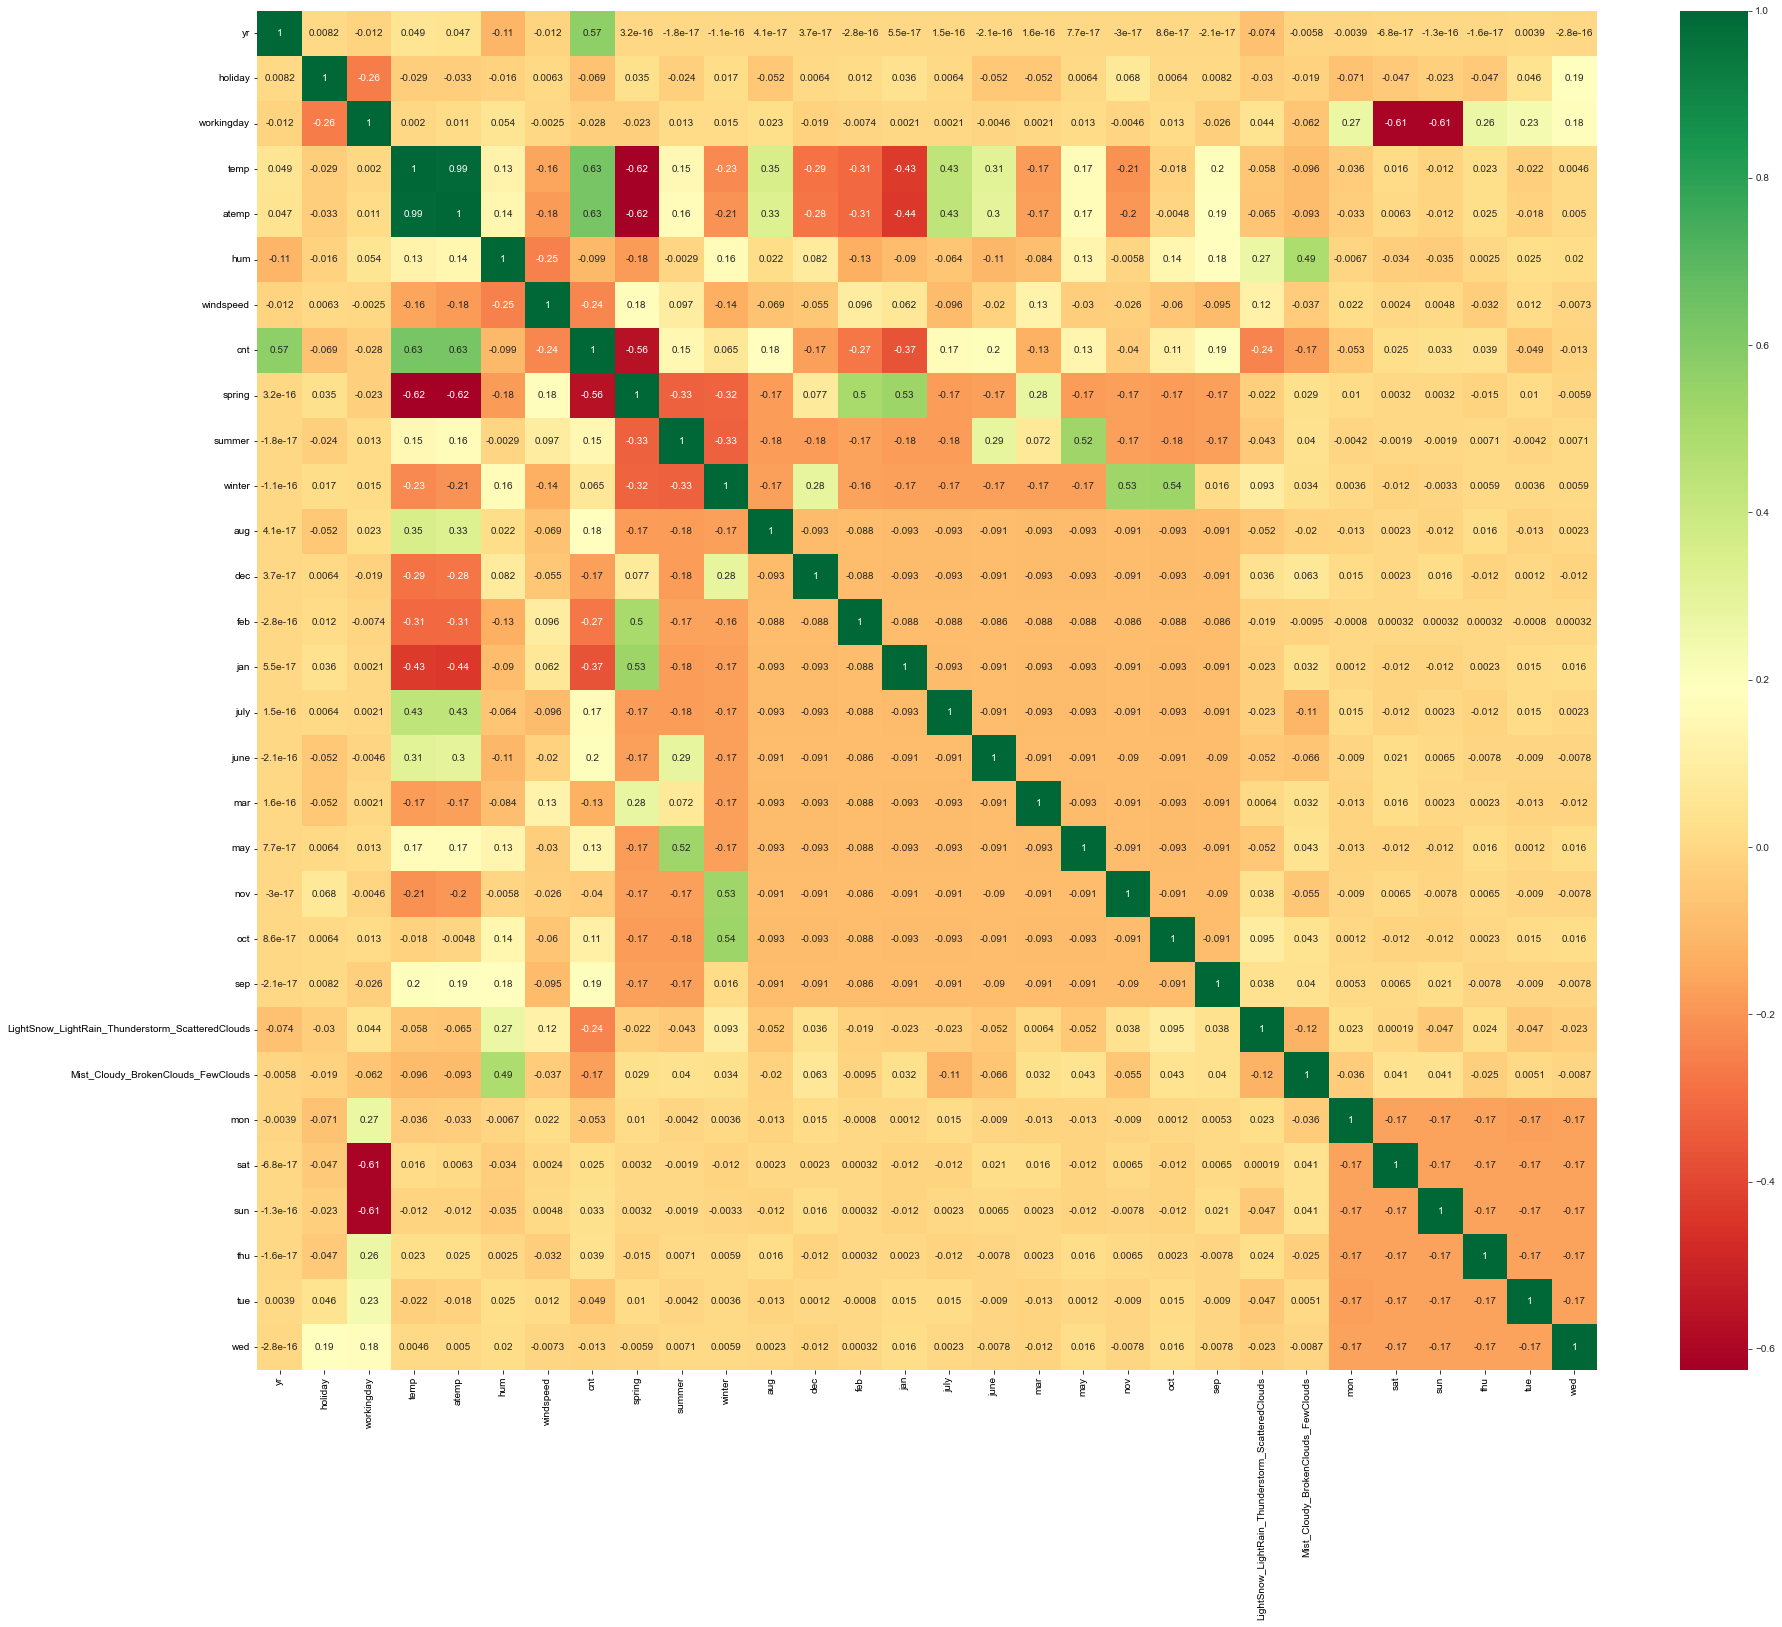

In [14]:
#checking correlation between numeric and boolean variables with cnt
res = bike_df.corr()
f, ax = plt.subplots(figsize=(30,25))
with sns.axes_style("white"):
    ax = sns.heatmap(res, annot=True, cmap='RdYlGn')
    plt.show()

#Observations: - CNT has strong positive correlation with yr, temp and atemp; and strong negative correlation with spring. 
# - Temp and atemp are also correlated with each other hence we can avoid using atemp while model building.
# - workingday is negatively correlated to sat and sun
# - Temp and atemp have negative correlation with spring

### 3. Model Building

 **3.1 Splitting data into test and train dataframes**

In [15]:
# We specify random state so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [16]:
df_train.shape

(510, 30)

In [17]:
df_test.shape

(219, 30)

In [18]:
#Normalization of temp, atemp, hum, windspeed and cnt variables
scaler = MinMaxScaler()
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,LightSnow_LightRain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds_FewClouds,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [19]:
df_train.describe()
#Min value is 0 and max value is 1 for all columns

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,LightSnow_LightRain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds_FewClouds,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**3.2 Dividing into X and Y sets for the model building**

In [20]:
#assigning cnt to y_train and the rest of the columns to X_train
y_train = df_train.pop('cnt')
X_train = df_train

In [21]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,LightSnow_LightRain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds_FewClouds,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [22]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

**3.3 Using RFE to select top 15 features for model**

In [23]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [24]:
#zipping of column names with ranking and support
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('LightSnow_LightRain_Thunderstorm_ScatteredClouds', True, 1),
 ('Mist_Cloudy_BrokenClouds_FewClouds', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11)]

In [25]:
#columns that offer support to prediction
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep',
       'LightSnow_LightRain_Thunderstorm_ScatteredClouds',
       'Mist_Cloudy_BrokenClouds_FewClouds'],
      dtype='object')

In [26]:
#columns that don't offer support to prediction
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

**3.4 Building model using statsmodel**

In [27]:
#generic function for calulcatin VIF for a df
def cal_VIF(df):
  vif = pd.DataFrame()
  vif['Features'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

Model 1

In [28]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Summary of linear model 1
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          3.34e-189
Time:                        12:44:50   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [29]:
#calculation VIF for model 1
cal_VIF(X_train_rfe)

#Observation: hum has a high VIF hence we will drop it, not removing temp as of now as it is an important factor 

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist_Cloudy_BrokenClouds_FewClouds,2.32
0,yr,2.09
11,nov,1.83
9,jan,1.75


In [30]:
#Removing hum as it has high ViF
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

Model 2 - After removing humidity

In [31]:
# Adding a constant variable 
X_train_lm_2 = sm.add_constant(X_train_new)

lm2 = sm.OLS(y_train,X_train_lm_2).fit()   # Running the linear model

#Summary of linear model 2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.57e-186
Time:                        12:44:50   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [32]:
#calculation VIF for model 2
cal_VIF(X_train_new)
#Observation: temp has high VIF but not removing it as of now as it is an important factor 

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,nov,1.80
8,jan,1.66
9,july,1.59
13,Mist_Cloudy_BrokenClouds_FewClouds,1.56


In [33]:
#since summer is insignificant with respect to other variables we build a model without it
X_train_new = X_train_new.drop(["summer"], axis = 1)

Model 3 - After removing summer

In [34]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_new)

lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

#Summary of linear model 3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.08e-186
Time:                        12:44:50   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [35]:
#calculation VIF for model 3
cal_VIF(X_train_new)
#Observation: all independent features have VIF < 5

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,nov,1.80
7,jan,1.65
12,Mist_Cloudy_BrokenClouds_FewClouds,1.53
6,dec,1.46
8,july,1.36


In [36]:
#since nov is insignificant with respect to other variables we build a model without it
X_train_new = X_train_new.drop(["nov"], axis = 1)

Model 4 - After removing nov

In [37]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_new)

lm4 = sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

#Summary of linear model 4
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          2.02e-186
Time:                        12:44:51   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [38]:
#calculation VIF for model 4
cal_VIF(X_train_new)
#Observation: all independent features have VIF < 5

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,yr,2.06
5,winter,1.64
7,jan,1.64
11,Mist_Cloudy_BrokenClouds_FewClouds,1.53
8,july,1.36
6,dec,1.29
9,sep,1.20


In [39]:
#since dec is insignificant with respect to other variables we build a model without it
X_train_new = X_train_new.drop(["dec"], axis = 1)

Model 5 - after removing dec

In [40]:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_new)

lm5 = sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

#Summary of linear model 5
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.13e-186
Time:                        12:44:51   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [41]:
#calculation VIF for model 5
cal_VIF(X_train_new)
#Observation: all independent features have VIF < 5

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
6,jan,1.60
10,Mist_Cloudy_BrokenClouds_FewClouds,1.53
5,winter,1.40
7,july,1.36
8,sep,1.20
9,LightSnow_LightRain_Thunderstorm_ScatteredClouds,1.08


In [42]:
#since jan is insignificant with respect to other variables we build a model without it (sun, spring, summer)
X_train_new = X_train_new.drop(["jan"], axis = 1)

Model 6 - after removing jan

In [43]:
# Adding a constant variable 
X_train_lm6 = sm.add_constant(X_train_new)

lm6 = sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

#Summary of linear model 6
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 09 Jan 2023   Prob (F-statistic):          1.16e-186
Time:                        12:44:51   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [44]:
#calculation VIF for model 6
cal_VIF(X_train_new)
#Observation: all independent features have VIF < 5

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
9,Mist_Cloudy_BrokenClouds_FewClouds,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,LightSnow_LightRain_Thunderstorm_ScatteredClouds,1.08
1,holiday,1.04


**Observation:** 
Model 6 seems to be the best model as r2 and adjusted r2 are 0.83.
P(t) = 0 for all features hence all are significant. VIF for all features is less than 5 hence no multicollieanrity is present.
F-statistic is 248.7 which is greater than 1 and probability of f-statistic is 1.13e-186 which is almost zero hence the overall model is significant.

### 4. Residual Analysis

In [45]:
#predection using model 6
y_train_pred = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

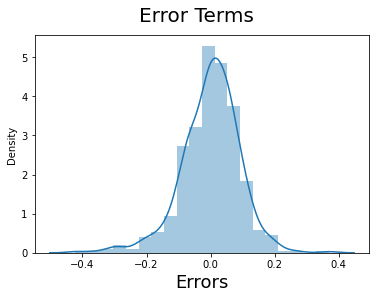

In [46]:
# Plotting the distirbution of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Observation:** As we can see from the distribution plot, the error terms are normally distributed with mean as 0.0.

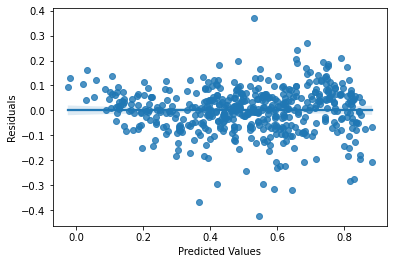

In [47]:
#checking for pattern in error terms
residual = y_train - y_train_pred
sns.regplot(y_train_pred,residual)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Observation:** As we can see from the regression plot, there is no visible pattern thus the error terms are independent of each other.

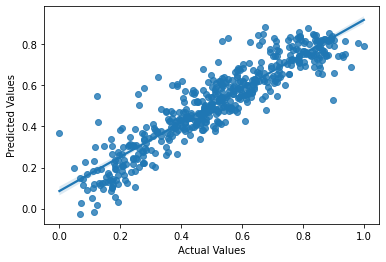

In [48]:
#checking if variance varies along with linearity of model
sns.regplot(y_train,y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

**Observations:** 
*   Constant variance between actual and predicted values. 
*   Actual and Predicted Values have a positive linear relation. The predicted values increase with the increase in the actual values.

### 5. Model Predictions

In [49]:
#Scaling the numeric columns in test dataframe
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])

In [50]:
#Dividing test dataframe into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [52]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,LightSnow_LightRain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds_FewClouds,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
# Creating X_test_new dataframe by dropping variables from X_test based on the final features in model selected
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm6.predict(X_test_new)

In [54]:
#calculating r2 for test data
r2 = r2_score(y_test, y_pred) 
round(r2,2)

0.81

In [55]:
#calculating adjusted r2 for test data
#adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1) where n is sample size and p is number of independent variables
adjustedr2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),2)
print(adjustedr2)

0.78


**Observation:** 
*   R2 for test data : 0.81
*   Adjusted R2 for test data: 0.78





### 6. Model Evaluation

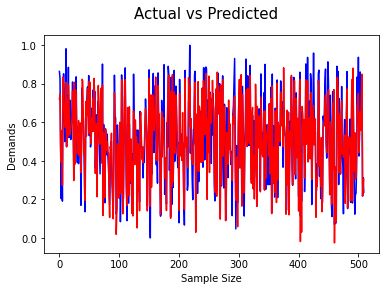

In [56]:
# Pattern of Actual vs Predicted values
count = [i for i in range(0,len(X_train),1)]
plt.plot(count,y_train, color="blue")
plt.plot(count,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Sample Size')
plt.ylabel('Demands')
plt.show()

**Observation:** Since the plot for actual and predicted is almost same, we can conclude that this is a good model.

In [57]:
#calculating mean squared error for train data
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
rmse

0.0917278190631319

In [58]:
#calculating mean squared error for test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.09574033200511814

**Observation:**  RMSE of train and test data are similar hence it is a good model.

### 7. Final Interpration of Model and Conclusion

In [59]:
lm6.params

#Observation: The demand is positively influenced by yr, temp, winter and sep. 
#It is negatively influenced by holiday, windspeed, spring, july, LightSnow_LightRain_Thunderstorm_ScatteredClouds and
#Mist_Cloudy_BrokenClouds_FewClouds

const                                               0.251899
yr                                                  0.234092
holiday                                            -0.098556
temp                                                0.451455
windspeed                                          -0.139817
spring                                             -0.110795
winter                                              0.047278
july                                               -0.072719
sep                                                 0.057705
LightSnow_LightRain_Thunderstorm_ScatteredClouds   -0.286408
Mist_Cloudy_BrokenClouds_FewClouds                 -0.081133
dtype: float64

**Final Linear Regression Equation:**
cnt = 0.251899 * const + 0.234092 * yr - 0.098556 * holiday + 0.451455 * temp - 0.139817 * windspeed - 0.110795 * spring + 0.047278 * winter - 0.072719 * july + 0.057705 * sep - 0.286408 * LightSnow_LightRain_Thunderstorm_ScatteredClouds - 0.081133 * Mist_Cloudy_BrokenClouds_FewClouds

**Conclusion**: 


*  Model 6 is considered to be the best model with adjusted r2 value of 0.83 for train data and 0.78 for test data.
*   The model is also satisfying the assumptions of linear regression.
*   RMSE for train and test data both are approximately same, thereby indicating it is a good model.
*   The demand of bike is influenced by the following factors: yr, holiday, temp, windspeed, spring, winter, july, sep, LightSnow_LightRain_Thunderstorm_ScatteredClouds and Mist_Cloudy_BrokenClouds_FewClouds

